**************************** PROCESSING SAMPLE DATA **********************************
To read in your own data, use sprit.run(input_data='/path/to/your/seismic/data.mseed')
      Any file format supported by osbpy.read() can be input to sprit_run()           
      Raw data (.trc) files from select Tromino Portable are also supported           
           See SpRIT Wiki or API documentation for more information:                  
              Wiki: https://github.com/RJbalikian/SPRIT-HVSR/wiki                     
          API Documentation: https://sprit.readthedocs.io/en/latest/#                 
**************************************************************************************

ph True


———————————————————————————————————————————————————————————————————————————————————————————————————
=                    SampleHVSRSite1_AM.RAC84.00.2023.046_2023-02-15_1704-1734                    =
—————————————————————————————————————————————————————————————————————————————————————————————

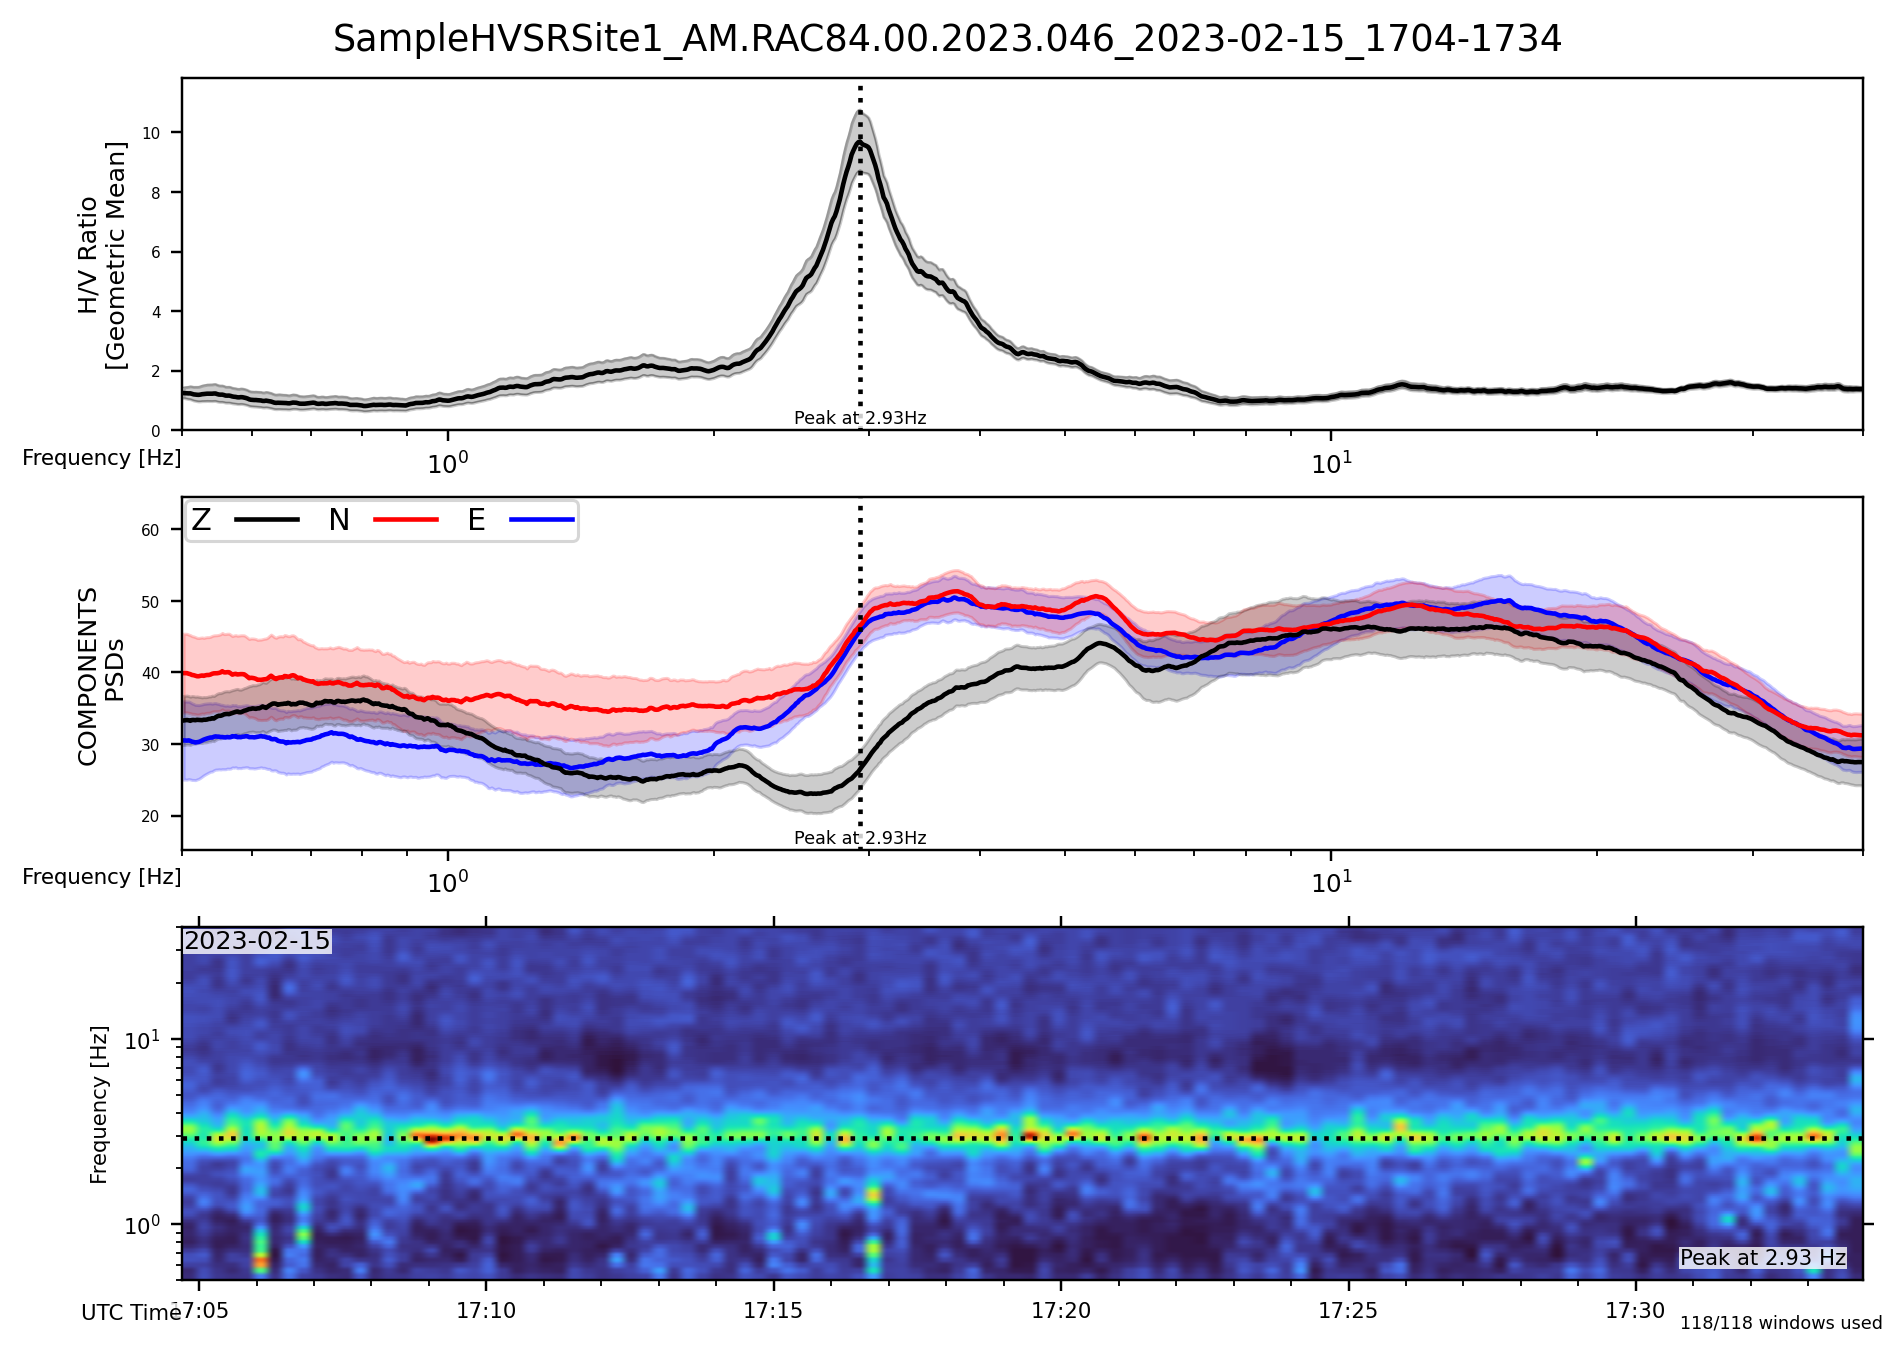

In [1]:
import sprit
hvData = sprit.run(suppress_report_outputs=True, show_plot_report=False)

acq_date was stringified
starttime was stringified
endtime was stringified
input_crs was stringified
output_crs was stringified
input_data was stringified
processing_parameters was stringified
inv was stringified
input_stream was stringified
stream was stringified
stream_edited was stringified
psds was stringified
hvsr_windows_df was stringified
x_freqs was stringified
hvsr_curve was stringified
x_period was stringified
psd_raw was stringified
current_times_used was stringified
psd_values_tavg was stringified
ppsd_std was stringified
ppsd_std_vals_m was stringified
ppsd_std_vals_p was stringified
ind_hvsr_curves was stringified
ind_hvsr_stdDev was stringified
ind_hvsr_peak_indices was stringified
hvsr_peak_indices was stringified
hvsr_peak_freqs was stringified
hvsr_log_std was stringified
hvsrp was stringified
hvsrm was stringified
hvsrp2 was stringified
hvsrm2 was stringified
PeakReport was stringified
BestPeak was stringified
Table_Report was stringified
Plot_Report was stringified

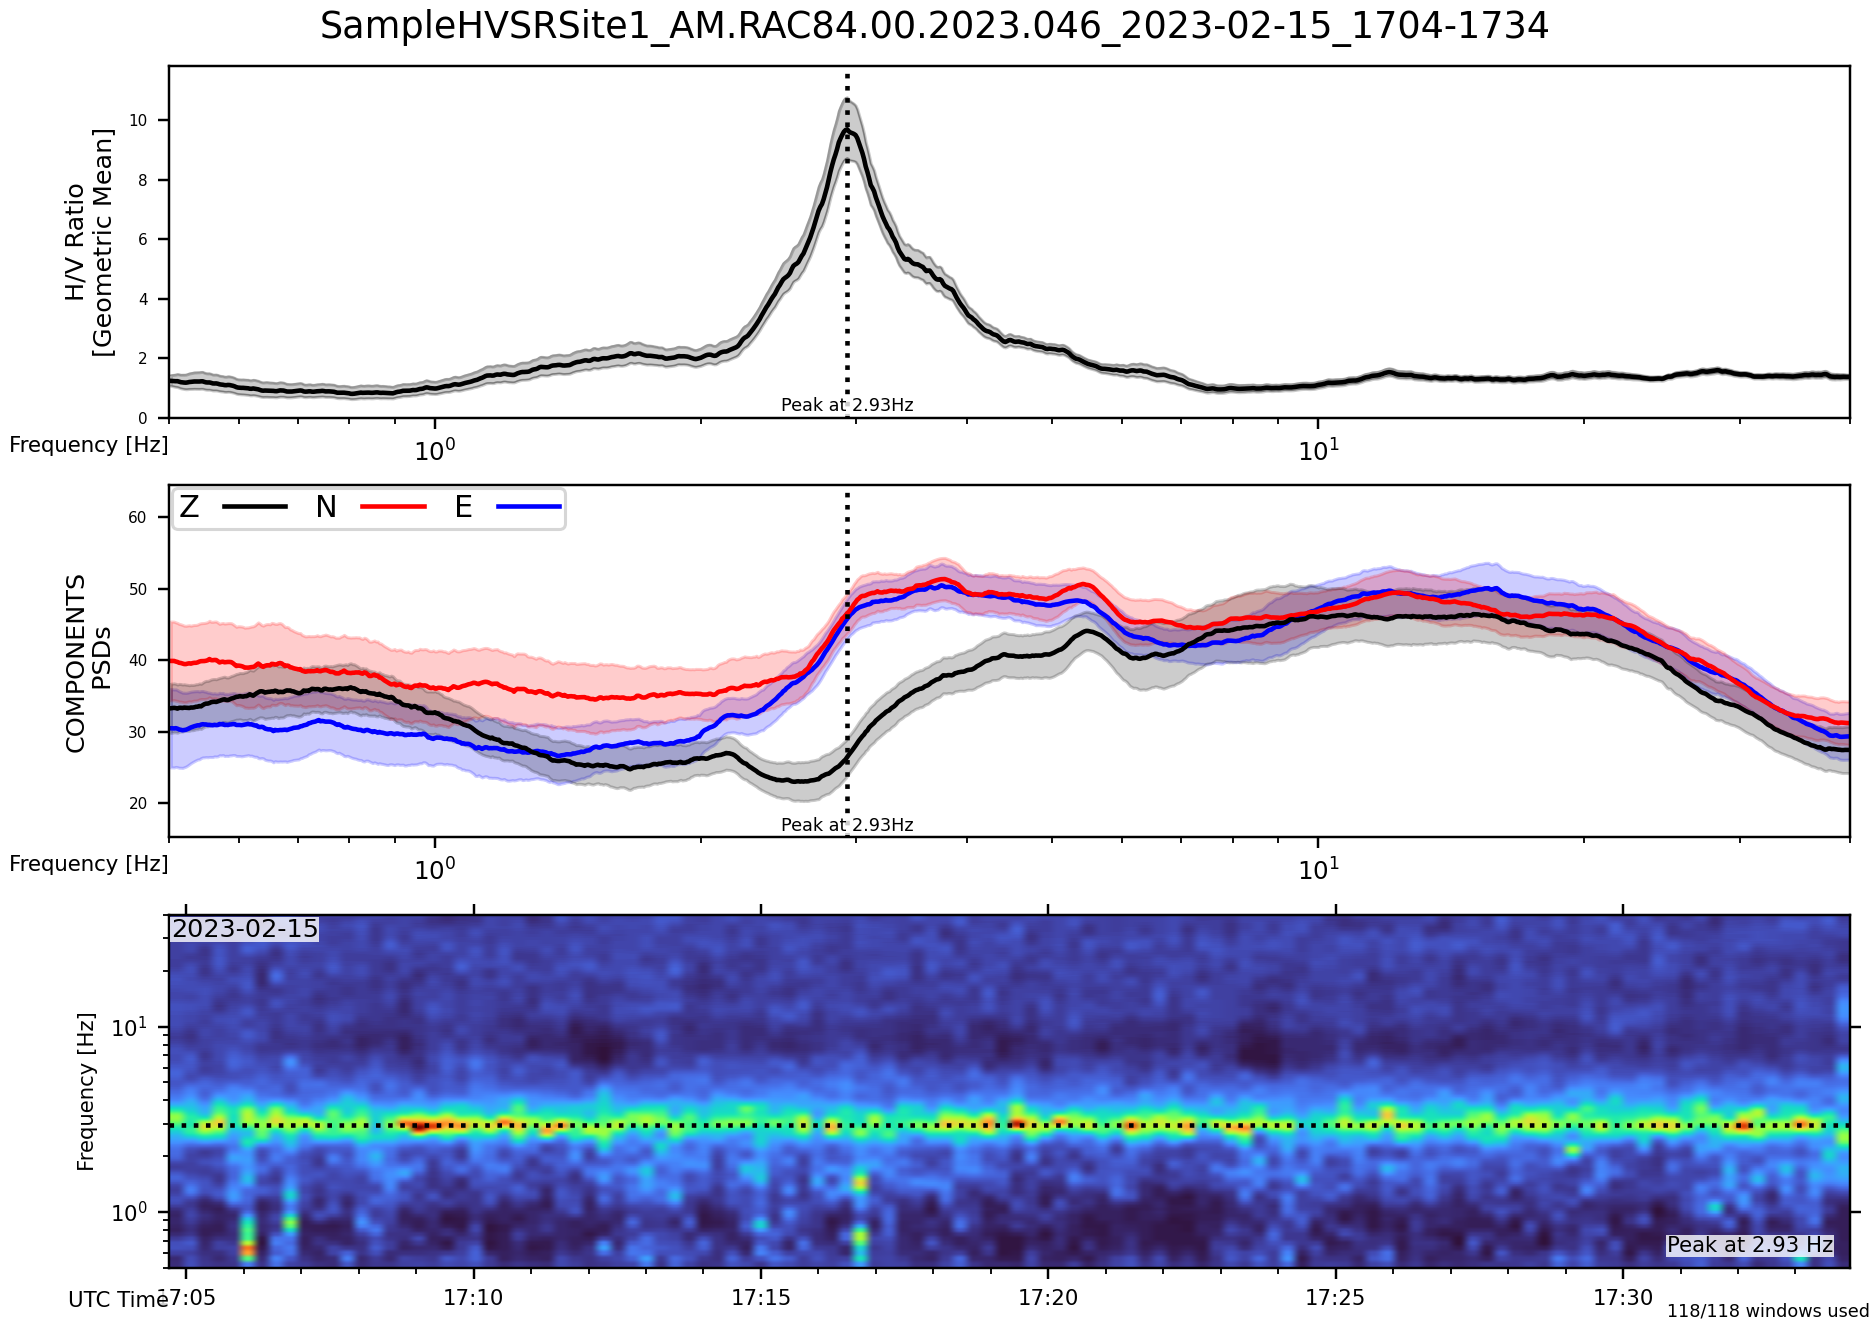

In [71]:
import datetime
import obspy
from pyproj import CRS
import obspy
import json
import numpy as np

def to_json(self, json_filepath=None, export_json=True, return_json=False, **kwargs):
    """Not yet supported, will export HVSRData object to json"""

    # Not currently using this, but keeping for now
    class_keys_to_convert = (datetime.date, obspy.UTCDateTime, 
                            datetime.time, CRS, obspy.Inventory)

    stringOK = ['acq_date', 'starttime', 'endtime', 'input_crs', 'output_crs', 'inv',
                'input_stream', 'stream', 'stream_edited', 'current_times_used']

    dicts_to_fix = ['processing_parameters', 'psds', 'hvsr_curve']

    channel_dicts = ['x_freqs', 'x_period', 'psd_raw', 'psd_values_tavg ', 
                    'ppsd_std', 'ppsd_std_vals_m', 'ppsd_std_vals_p'] 

    az_dicts = ['ind_hvsr_curves', 'ind_hvsr_stdDev', 'ind_hvsr_peak_indices', # need to fix these keys for consistency
                'hvsr_peak_indices', 'hvsr_peak_freqs', 'hvsr_log_std', # 'hvsr_curve', # need to fix this
                'hvsrp', 'hvsrm', 'hvsrp2', 'hvsrm2',
                ]

    odd_dicts = ['BestPeak ', 'PeakReport']


    #dataframes =  ['hvsr_windows_df', 'Table_Report']
    # plots = ['Plot_Report', 'Input_Plot', ]
    sKeys = True
    if 'sort_keys' in kwargs:
        sKeys = kwargs['sort_keys']
        del kwargs['sort_keys']

    indent = 4
    if 'indent' in kwargs:
        indent = kwargs['indent']
        del kwargs['indent']

    dict_for_json = {}
    dict_str_list = []
    for k, v in self.__dict__.items():
        if k=='_batch':
            continue
        
        try:
            json.dumps({k:v})
            dict_for_json[k] = v
        except Exception as e:
            print(f'{k} was stringified')
            dict_for_json[k] = str(v)

            if k in stringOK:
                dict_for_json[k] = str(v)

            # Get string to add to end of json.dumps output later
            indentSpaces = ''.join([' ']*indent)
            if k in channel_dicts:
                del dict_for_json[k]
                dictString = f'{indentSpaces}"{k}": '+'{\n'+indentSpaces+indentSpaces
                for cha, chaVals in v.items():
                    outDict = {cha:chaVals}
                    if isinstance(chaVals, np.ndarray):
                        outDict = {cha: np.round(chaVals, 3).tolist()}
                    dictString += json.dumps(outDict) + ',\n'+indentSpaces+indentSpaces
                dict_str_list.append(dictString[:dictString.rfind(',')] + f',\n{indentSpaces}'+'},\n')


    if export_json and json_filepath is not None:
        with open(json_filepath, 'w') as f:
            # dump the JSON string to the file
            json.dump(dict_for_json, 
                        fp=f,
                        sort_keys=sKeys, 
                        indent=indent,
                        **kwargs)


    if return_json or json_filepath is None:
        jsonString = json.dumps(dict_for_json,
                            sort_keys=sKeys, indent=indent, **kwargs)
        
        jsonStringOUT = jsonString
        if len(dict_str_list) > 1: 
            jsonStringOUT = jsonStringOUT[:-2]+',\n'

        for ds in dict_str_list:
            jsonStringOUT = jsonStringOUT + ds
        return jsonStringOUT + '}'

print(to_json(hvData))